In [126]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.ticker

import tensorflow.keras
from tensorflow.keras import utils
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import  load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [108]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

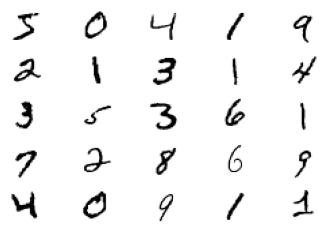

In [109]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [110]:
xtrain.shape , xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [111]:
ytrain.shape, ytest.shape

((60000,), (10000,))

In [112]:
# reshape to be [samples][width][height][channels]
xtrain =xtrain.reshape(60000, 784)
xtest =xtest.reshape(10000, 784)

# convert to float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

# normalizing the data

xtrain /= 255
xtest /= 255

In [113]:
# one-hot encoding

ytrain= utils.to_categorical(ytrain, num_classes=10)
ytest= utils.to_categorical(ytest, num_classes=10)

In [114]:
# building the model

model = Sequential([
    Dense(500, input_shape=(784,)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(500, input_shape=(784,)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10 , activation='softmax')
])

In [115]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_15 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 500)              

In [116]:
# compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [117]:
history = model.fit(xtrain, ytrain, epochs=20 , verbose =1 , batch_size=120, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 24s 491us/sample - loss: 0.2337 - acc: 0.9293 - val_loss: 0.1105 - val_acc: 0.9657
Epoch 2/20
48000/48000 [==============================] - 16s 334us/sample - loss: 0.1040 - acc: 0.9674 - val_loss: 0.0986 - val_acc: 0.9705
Epoch 3/20
48000/48000 [==============================] - 15s 313us/sample - loss: 0.0770 - acc: 0.9752 - val_loss: 0.0901 - val_acc: 0.9743
Epoch 4/20
48000/48000 [==============================] - 19s 386us/sample - loss: 0.0617 - acc: 0.9795 - val_loss: 0.0880 - val_acc: 0.9747
Epoch 5/20
48000/48000 [==============================] - 18s 373us/sample - loss: 0.0546 - acc: 0.9825 - val_loss: 0.0933 - val_acc: 0.9732
Epoch 6/20
48000/48000 [==============================] - 19s 399us/sample - loss: 0.0484 - acc: 0.9843 - val_loss: 0.0810 - val_acc: 0.9768
Epoch 7/20
48000/48000 [==============================] - 19s 396us/sample - loss: 0.0375 - acc: 0.9876 

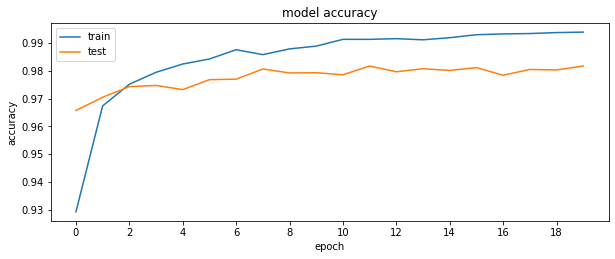

In [127]:
plt.rcParams['figure.figsize'] = (10,8)
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

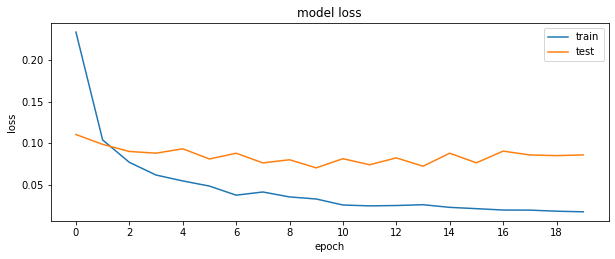

In [128]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])